# Helper Methods

In [1]:
import numpy as np

# outlier removal method: IQR
# returns list without outliers
# http://colingorrie.github.io/outlier-detection.html
# https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
def remove_outliers_iqr(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    cut_off = (iqr * 1.5)
    lower_bound = quartile_1 - cut_off
    upper_bound = quartile_3 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data if x >= lower_bound and x <= upper_bound]
    print('Non-outlier observations: %d' % len(outliers_removed))
    return outliers_removed

# annotates plt with y values
def plot_annotate(plt,xvalues,yvalues):
    for i,j in zip(xvalues, yvalues):
        plt.annotate(str(np.round(j,1)),xy=(i-0.15,j))
    
def autolabel_barchart(rects,axis,divide_by_1000):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if(divide_by_1000 == False):
            axis.text(rect.get_x() + rect.get_width()/2., 0.9*height,'%.1f' % round(float(height),1),ha='center', va='bottom')
        else:
            axis.text(rect.get_x() + rect.get_width()/2., 0.9*height,'%.1f' % round(float(height/1000),1),ha='center', va='bottom')

def autolabel_barchart_2(rects,axis,divide_by_1000):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if(divide_by_1000 == False):
            axis.text(rect.get_x() + rect.get_width()/2., 0.80*height,'%.f' % round(float(height)),ha='center', va='bottom')
        else:
            axis.text(rect.get_x() + rect.get_width()/2., 0.80*height,'%.f' % round(float(height/1000)),ha='center', va='bottom')

# PyMongo Query

db = "test"
collection = "benchmarklogs"

In [2]:
from pymongo import MongoClient
client = MongoClient()

db = client['test']
collection = db['benchmarklogs']

# PyMongo Query ->Pandas DataFrame

In [3]:
import numpy as np
import pandas as pd

#query = {"$and":[ {"$or":[{"instanceType":"c5.large"},{"instanceType":"t2.xlarge"},{"instanceType":"c5.xlarge"},{"instanceType":"c5.2xlarge"},{"instanceType":"c5.4xlarge"}]}, 
#        {"usedGenesisJson":"genesis_pow_max_performance.json"}, {"maxTransactions": 1000}, {"scenario":"account"}, {"nodes":5}]}

query = {"$and":[ {"$or":[{"instanceType":"c5.large"},{"instanceType":"c5.xlarge"},{"instanceType":"c5.2xlarge"},{"instanceType":"c5.4xlarge"}]}, 
        {"usedGenesisJson":"genesis_pow_max_performance.json"}, {"maxTransactions": 1000}, {"scenario":"account"}, {"nodes":5}, {"miningOnFullWorkload":{"$exists": False}}]}

# Make a query to the specific DB and Collection
cursor = collection.find(query)

# Expand the cursor and construct the DataFrame
df = pd.DataFrame(list(cursor))

#display(df.head(200))

sample_size = len(df.index)
print("Number of rows:" + str(sample_size))

Number of rows:298


# Pandas DataFrame -> Plot
## Throughput

In [4]:
import matplotlib.pyplot as plt

data_tps_instanceType = df[['txPerSecond','instanceType']]
data_hashRate_instanceType = df[['hashRate','instanceType']]

title_tps = "Throughput against Node Configuration (PoW, n=" + str(sample_size) + ")"
title_hashRate = "Hashrate against Node Configuration (PoW, n=" + str(sample_size) + ")"

xlabel = "Node Configuration"
ylabel_tps = "Transactions Per Second (TPS)"
ylabel_tps_average = "Average Transactions Per Second (TPS)"
ylabel_hashRate_average="Average Hashrate"

#objects = list(['c5.large', 'c5.xlarge', 't2.xlarge', 'c5.2xlarge', 'c5.4xlarge'])
objects = list(['c5.large', 'c5.xlarge', 'c5.2xlarge', 'c5.4xlarge'])
y_pos = np.arange(len(objects))

data1_tps = data_tps_instanceType.loc[df['instanceType'] == "c5.large"].iloc[:,0]
data2_tps = data_tps_instanceType.loc[df['instanceType'] == "c5.xlarge"].iloc[:,0]
#data3_tps = data_tps_instanceType.loc[df['instanceType'] == "t2.xlarge"].iloc[:,0]
data4_tps = data_tps_instanceType.loc[df['instanceType'] == "c5.2xlarge"].iloc[:,0]
data5_tps = data_tps_instanceType.loc[df['instanceType'] == "c5.4xlarge"].iloc[:,0]

# REMOVE OUTLIERS
#data1_tps = pd.Series(remove_outliers_iqr(data1_tps))
#data2_tps = pd.Series(remove_outliers_iqr(data2_tps))
#data3_tps = pd.Series(remove_outliers_iqr(data3_tps))
#data4_tps = pd.Series(remove_outliers_iqr(data4_tps))
#data5_tps = pd.Series(remove_outliers_iqr(data5_tps))

## combine these different collections into a list    
#data_to_plot_tps = [data1_tps,data2_tps,data3_tps,data4_tps,data5_tps]
data_to_plot_tps = [data1_tps,data2_tps,data4_tps,data5_tps]

avg1_tps = data1_tps.mean()
avg2_tps = data2_tps.mean()
#avg3_tps = data3_tps.mean()
avg4_tps = data4_tps.mean()
avg5_tps = data5_tps.mean()

avg1_hashRate = data_hashRate_instanceType.loc[df['instanceType'] == "c5.large"].iloc[:,0].mean()
avg2_hashRate = data_hashRate_instanceType.loc[df['instanceType'] == "c5.xlarge"].iloc[:,0].mean()
#avg3_hashRate = data_hashRate_instanceType.loc[df['instanceType'] == "t2.xlarge"].iloc[:,0].mean()
avg4_hashRate = data_hashRate_instanceType.loc[df['instanceType'] == "c5.2xlarge"].iloc[:,0].mean()
avg5_hashRate = data_hashRate_instanceType.loc[df['instanceType'] == "c5.4xlarge"].iloc[:,0].mean()

#means_tps = [avg1_tps, avg2_tps, avg3_tps, avg4_tps, avg5_tps]
means_tps = [avg1_tps, avg2_tps, avg4_tps, avg5_tps]
#means_hashRate = [avg1_hashRate, avg2_hashRate, avg3_hashRate, avg4_hashRate, avg5_hashRate]
means_hashRate = [avg1_hashRate, avg2_hashRate, avg4_hashRate, avg5_hashRate]

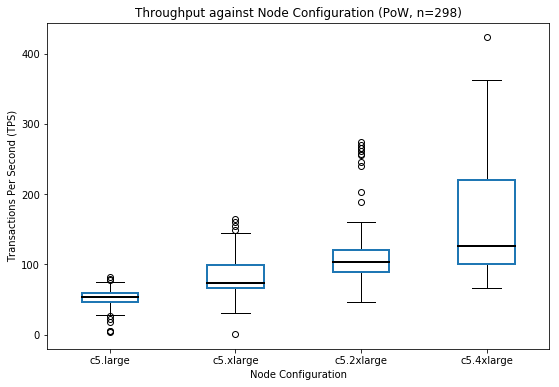

In [5]:
color_latency="#ff7f0e"
color_tps="#1f77b4"

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title_tps)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel_tps)

# Create the boxplot

bp = ax.boxplot(data_to_plot_tps,labels=objects, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set(color=color_tps, linewidth=2)
    # change fill color
    box.set(facecolor="w")
    
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color="k", linewidth=2) 
    
fig.savefig("result_nodes_configuration_pow_throughput_boxplot.svg", format="svg")



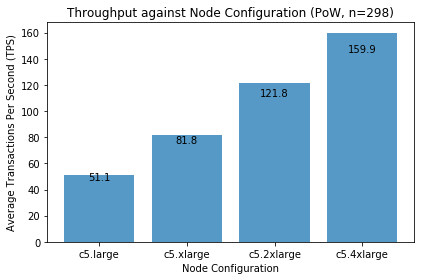

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

N = len(means_tps)
ind = np.arange(N) # the x locations for the groups

rects1 = ax1.bar(ind, means_tps, alpha=0.75, color=color_tps)
ax1.set_title(title_tps)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel_tps_average)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(objects)

autolabel_barchart(rects1,ax1,False)
fig.tight_layout()
#fig.savefig("result_nodes_configuration_pow_throughput_barchart.svg", format="svg")
plt.show()

### HashRate

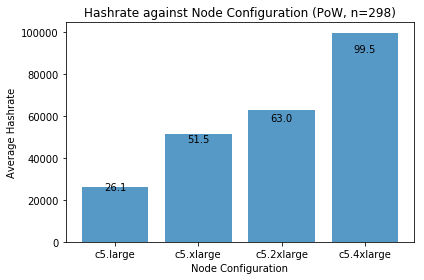

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

N = len(means_hashRate)
ind = np.arange(N) # the x locations for the groups

rects1 = ax1.bar(ind, means_hashRate, alpha=0.75, color=color_tps)
ax1.set_title(title_hashRate)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel_hashRate_average)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(objects)

autolabel_barchart(rects1,ax1,True)
fig.tight_layout()
#fig.savefig("result_nodes_configuration_pow_hashrate_barchart.svg", format="svg")
plt.show()

## HashRate and TPS Combined

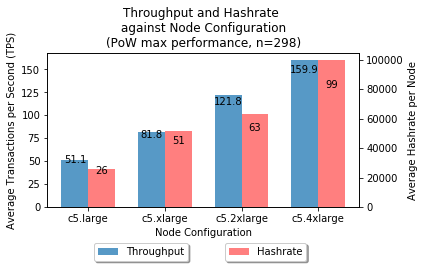

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

N = len(means_hashRate)
ind = np.arange(N) # the x locations for the groups
width = 0.35 # the width of the bars

## the bars
rects1 = ax1.bar(ind, means_tps, width, color=color_tps, alpha=0.75, label="Throughput")
ax1.set_ylabel("Average Transactions per Second (TPS)")
ax1.set_xlabel(xlabel)

ax2 = ax1.twinx()
rects2 = ax2.bar(ind+width, means_hashRate, width,color="r", alpha=0.5, label="Hashrate")
ax2.set_ylabel("Average Hashrate per Node")

# axes and labels
#ax1.set_xlim(-width,len(ind)+width)
ax1.set_title("Throughput and Hashrate \n against Node Configuration \n(PoW max performance, n=" + str(sample_size) + ")")
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(objects)

## add a legend

ax1.legend(loc='upper center', bbox_to_anchor=(0.3, -0.2),
          ncol=3, fancybox=True, shadow=True)

ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.2),
          ncol=3, fancybox=True, shadow=True)

autolabel_barchart(rects1,ax1,False)
autolabel_barchart_2(rects2,ax2,True)

#ax1.set_ylim(ymax=200)
#ax2.set_ylim(ymax=110000)

fig.tight_layout()
ax1.figure.savefig("result_nodes_configuration_pow_tps_hashrate_combined_barchart.svg", format="svg",bbox_inches='tight')

plt.show()

## Latency

In [9]:
import matplotlib.pyplot as plt

data_latency_instanceType = df[['averageDelay','instanceType']]

title_latency = "Latency against Node Configuration (PoW, n=" + str(sample_size) + ")"
ylabel_latency = "Transaction Latency [seconds]"
ylabel_latency_average = "Average Transaction Latency [seconds]"

data1_latency = data_latency_instanceType.loc[df['instanceType'] == "c5.large"].iloc[:,0]
data2_latency = data_latency_instanceType.loc[df['instanceType'] == "c5.xlarge"].iloc[:,0]
#data3_latency = data_latency_instanceType.loc[df['instanceType'] == "t2.xlarge"].iloc[:,0]
data4_latency = data_latency_instanceType.loc[df['instanceType'] == "c5.2xlarge"].iloc[:,0]
data5_latency = data_latency_instanceType.loc[df['instanceType'] == "c5.4xlarge"].iloc[:,0]

# REMOVE OUTLIERS
#data1_latency = pd.Series(remove_outliers_iqr(data1_latency))
#data2_latency = pd.Series(remove_outliers_iqr(data2_latency))
#data3_latency = pd.Series(remove_outliers_iqr(data3_latency))
#data4_latency = pd.Series(remove_outliers_iqr(data4_latency))
#data5_latency = pd.Series(remove_outliers_iqr(data5_latency))

## combine these different collections into a list    
#data_to_plot_latency = [data1_latency,data2_latency,data3_latency,data4_latency,data5_latency]
data_to_plot_latency = [data1_latency,data2_latency,data4_latency,data5_latency]

avg1_latency = data1_latency.mean()
avg2_latency = data2_latency.mean()
#avg3_latency = data3_latency.mean()
avg4_latency = data4_latency.mean()
avg5_latency = data5_latency.mean()

#means_latency = [avg1_latency, avg2_latency, avg3_latency, avg4_latency, avg5_latency]
means_latency = [avg1_latency, avg2_latency, avg4_latency, avg5_latency]

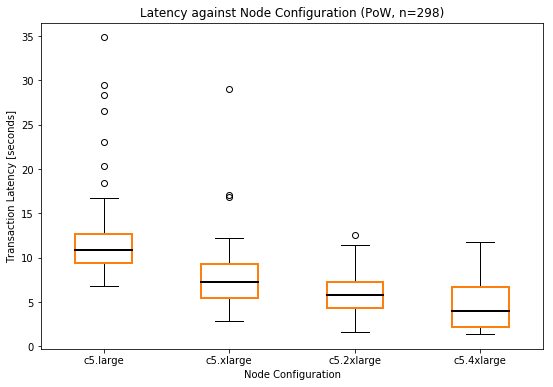

In [10]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title_latency)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel_latency)

# Create the boxplot

bp = ax.boxplot(data_to_plot_latency,labels=objects, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color=color_latency, linewidth=2)
    # change fill color
    box.set( facecolor = 'w' )
    
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color="k", linewidth=2) 
    
fig.savefig("result_nodes_configuration_pow_latency_boxplot.svg", format="svg")

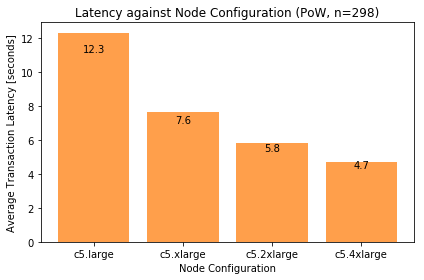

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

N = len(means_tps)
ind = np.arange(N) # the x locations for the groups

rects1 = ax1.bar(ind, means_latency, alpha=0.75, color=color_latency)
ax1.set_title(title_latency)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel_latency_average)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(objects)

autolabel_barchart(rects1,ax1,False)
fig.tight_layout()
#fig.savefig("result_nodes_configuration_pow_latency_barchart.svg", format="svg")
plt.show()

## Throughput and Latency Combined

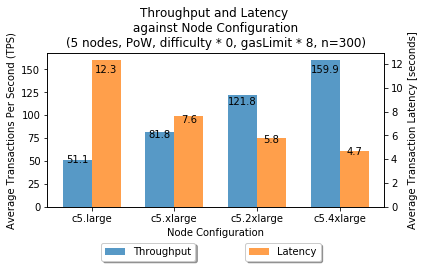

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

N = len(means_tps)
ind = np.arange(N) # the x locations for the groups
width = 0.35 # the width of the bars

## the bars
rects1 = ax1.bar(ind, means_tps, width, color=color_tps,alpha=0.75, label="Throughput")
ax1.set_ylabel(ylabel_tps_average)
ax1.set_xlabel(xlabel)

ax2 = ax1.twinx()
rects2 = ax2.bar(ind+width, means_latency, width,color=color_latency,alpha=0.75, label="Latency")
ax2.set_ylabel(ylabel_latency_average)

# axes and labels
#ax1.set_xlim(-width,len(ind)+width)
ax1.set_title("Throughput and Latency \n against Node Configuration \n(5 nodes, PoW, difficulty * 0, gasLimit * 8, n=" + str(300) + ")")
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(objects)

## add a legend
ax1.legend(loc='upper center', bbox_to_anchor=(0.3, -0.2),
          ncol=3, fancybox=True, shadow=True)

ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.2),
          ncol=3, fancybox=True, shadow=True)

autolabel_barchart(rects1,ax1,False)
autolabel_barchart(rects2,ax2,False)

#ax1.set_ylim(ymax=200)
#ax2.set_ylim(ymax=110000)

fig.tight_layout()
ax1.figure.savefig("result_nodes_configuration_pow_combined_barchart.svg", format="svg",bbox_inches='tight')
plt.show()

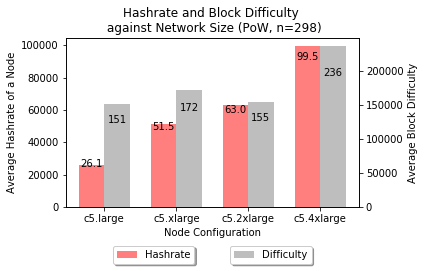

In [13]:
data_difficulty_nodes = df[['difficulty','instanceType']]

avg1_difficulty = data_difficulty_nodes.loc[df['instanceType'] == "c5.large"].iloc[:,0].mean()
avg2_difficulty = data_difficulty_nodes.loc[df['instanceType'] == "c5.xlarge"].iloc[:,0].mean()
#avg3_difficulty = data_difficulty_nodes.loc[df['instanceType'] == "t2.xlarge"].iloc[:,0].mean()
avg4_difficulty = data_difficulty_nodes.loc[df['instanceType'] == "c5.2xlarge"].iloc[:,0].mean()
avg5_difficulty = data_difficulty_nodes.loc[df['instanceType'] == "c5.4xlarge"].iloc[:,0].mean()

means_difficulty = [avg1_difficulty, avg2_difficulty, avg4_difficulty, avg5_difficulty]

fig = plt.figure()
ax1 = fig.add_subplot(111)

N = len(means_hashRate)
ind = np.arange(N) # the x locations for the groups
width = 0.35 # the width of the bars

## the bars
rects1 = ax1.bar(ind, means_hashRate, width, color="r", alpha=0.5, label="Hashrate")
ax1.set_ylabel("Average Hashrate of a Node")
ax1.set_xlabel(xlabel)

ax2 = ax1.twinx()
rects2 = ax2.bar(ind+width, means_difficulty, width,color="#7f7f7f", alpha=0.5, label="Difficulty")
ax2.set_ylabel("Average Block Difficulty")

# axes and labels
#ax1.set_xlim(-width,len(ind)+width)
ax1.set_title("Hashrate and Block Difficulty \n against Network Size (PoW, n=" + str(sample_size) + ")")
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(objects)

## add a legend
ax1.legend(loc='upper center', bbox_to_anchor=(0.3, -0.2),
          ncol=3, fancybox=True, shadow=True)

ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.2),
          ncol=3, fancybox=True, shadow=True)

autolabel_barchart(rects1,ax1,True)
autolabel_barchart_2(rects2,ax2,True)

fig.tight_layout()
ax1.figure.savefig("result_node_configuration_pow_hashrate_difficulty_combined_barchart.svg", format="svg",bbox_inches='tight')

plt.show()

# Scalability calculations

In [14]:
def calculateScalabilityInPercent(x,y):
    return str(round(abs(x-y)/x * 100,2))

print("\nThroughput Scalability:")
print("large to xlarge: " + calculateScalabilityInPercent(avg1_tps,avg2_tps) + "%")
print("xlarge to 2xlarge: " + calculateScalabilityInPercent(avg2_tps,avg4_tps) + "%")
print("2xlarge to 4xlarge: " + calculateScalabilityInPercent(avg4_tps,avg5_tps) + "%")

print("\nLatency Scalability:")
print("large to xlarge: " + calculateScalabilityInPercent(avg1_latency,avg2_latency) + "%")
print("xlarge to 2xlarge: " + calculateScalabilityInPercent(avg2_latency,avg4_latency) + "%")
print("2xlarge to 4xlarge: " + calculateScalabilityInPercent(avg4_latency,avg5_latency) + "%")

print("\nHash-Rate Scalability:")
print("large to xlarge: " + calculateScalabilityInPercent(avg1_hashRate,avg2_hashRate) + "%")
print("xlarge to 2xlarge: " + calculateScalabilityInPercent(avg2_hashRate,avg4_hashRate) + "%")
print("2xlarge to 4xlarge: " + calculateScalabilityInPercent(avg4_hashRate,avg5_hashRate) + "%")


Throughput Scalability:
large to xlarge: 60.27%
xlarge to 2xlarge: 48.9%
2xlarge to 4xlarge: 31.22%

Latency Scalability:
large to xlarge: 37.82%
xlarge to 2xlarge: 24.14%
2xlarge to 4xlarge: 18.89%

Hash-Rate Scalability:
large to xlarge: 97.0%
xlarge to 2xlarge: 22.31%
2xlarge to 4xlarge: 57.97%
